# Problem Sheet 4
- To be completed by **12noon** on **Wednesday 30th October** and uploaded to [Problem Sheet 4 submission point](https://moodle.bath.ac.uk/mod/assign/view.php?id=1379919) on Moodle.

## Clustering of text documents

In this problem sheet we consider clustering algorithms and their application to text data.

## Task (a) (Warm-up): centroid with respect to Euclidean distance

Let $C$ be a set of vectors $\mathbf{x} \in \mathbb{R}^n$. 

- **Prove** that the vector
$$
\boldsymbol\mu = \frac{1}{|C|} \sum_{\mathbf{x} \in C} \mathbf{x}
$$
(where $|C|$ is the cardinality of $C$) minimises the so-called _centroid_ loss $L(\boldsymbol\mu) := \sum_{\mathbf{x} \in C} \|\mathbf{x}-\boldsymbol\mu\|_2^2$.

## Solution:
Writing $L$ componentwise, assuming $\mathbf{x}=(x_1,\ldots,x_n)$ and $\boldsymbol\mu=(\mu_1,\ldots,\mu_n)$,
$$
L(\boldsymbol\mu) = \sum_{\mathbf{x}\in C} \|\mathbf{x} - \boldsymbol\mu\|_2^2 = \sum_{\mathbf{x}\in C} \sum_{j=1}^n (x_j - \mu_j)^2 = \sum_{j=1}^n \underbrace{\sum_{\mathbf{x}\in C} (x_j - \mu_j)^2}_{L_j(\mu_j)},
$$
we can minimise each component $L_j(\mu_j)$ independently by taking its derivative to zero,
$$
\frac{d L_j}{d \mu_j} = \sum_{\mathbf{x}\in C} \left[2 (x_j - \mu_j)\right] = 2 \sum_{\mathbf{x}\in C} x_j - 2\sum_{\mathbf{x}\in C} \mu_j = 2 \sum_{\mathbf{x}\in C} x_j - 2 |C| \mu_j = 0.
$$
Solving this we get $\mu_{j} = \frac{1}{|C|} \sum_{\mathbf{x}\in C} x_j$ for the elements of the centroid $\boldsymbol\mu = (\mu_{1},\ldots,\mu_{n})$, as requested.

## Task (b): K-means with cosine similarity score

- **Prove** that if $\|\mathbf{x}\|_2=\|\boldsymbol\mu\|_2=1$ $\forall \mathbf{x},\boldsymbol\mu \in \mathbb{R}^n$, then 
$$
\|\mathbf{x} - \boldsymbol\mu\|_2^2 = 2 - 2\cos\angle(\mathbf{x},\boldsymbol\mu).
$$

_Hint: expand $\|\mathbf{x} - \boldsymbol\mu\|_2^2$ using inner products of vectors._

**Remark**: therefore, lower Euclidean distance is equivalent to higher cosine score, and the standard K-means algorithm with Euclidean distance can be used if term-to-document vectors are produced with `TfidfVectorizer`.

## Solution:
$$
\|\mathbf{x} - \boldsymbol\mu\|_2^2 = \langle \mathbf{x} - \boldsymbol\mu, \mathbf{x} - \boldsymbol\mu \rangle = \|\mathbf{x}\|_2^2 - 2 \langle \mathbf{x}, \boldsymbol\mu \rangle + \|\boldsymbol\mu\|_2^2 = 2 - 2\langle \mathbf{x}, \boldsymbol\mu \rangle = 2 - 2 \frac{\langle \mathbf{x}, \boldsymbol\mu \rangle}{\|\mathbf{x}\|_2 \|\boldsymbol\mu\|_2} = 2 - 2\cos\angle(\mathbf{x},\boldsymbol\mu).
$$

---

## Task 1 (Warm-up)
**Write** (or borrow) a Python **code** to apply the K-means algorithm (with $K=2$) with the Euclidean distance function to the following term-to-document matrix:
$$
X = \begin{bmatrix}
     1 & 1 & 0 & 0 & 1 \\
     0 & 1 & 1 & 0 & 1 \\
     0 & 0 & 0 & 1 & 1
    \end{bmatrix}.
$$

In [1]:
import numpy as np
from sklearn.cluster import KMeans
X = np.array([[1,1,0,0,1], [0,1,1,0,1], [0,0,0,1,1]])
kmeans = KMeans(n_clusters=2, n_init='auto')
kvec = kmeans.fit_predict(X)
kvec

array([0, 0, 1], dtype=int32)

## Task 2: Information retrieval of Bath Pages

Write a Python code which:
- Loads the Bath website text data from `BathPages.npz` (if you don't see it in the `week4` folder on Noteable, remember to run the `Update` notebook).
- Computes its TF $\cdot$ IDF term-to-document matrix with the 2-norm of each row equal 1 as required in Task (b).

In [2]:
import numpy as np
D = np.load('BathPages.npz')
titles = D["titles"]
docs = D["docs"]

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words='english')
X = tv.fit_transform(docs).toarray()

## Task 3: K-means clustering of Bath pages

- **Write** a Python **code** that:
  - varies the number of clusters $K$ from 2 to 20 (inclusive);
  - for each $K$ runs the $K$-means algorithm 10 times to clusterise the rows of the TF $\cdot$ IDF term-to-document matrix from Task 2 and compute the $K$-means loss of that clustering;
  - once both loops are complete, plots the $K$-means loss as a function of $K$ for each of the 10 runs on the same plot. Keep in mind that $K$ is a discrete variable.

- **Find** an elbow point on the $K$-means loss plot. Use your own judgement to decide which number of clusters $K^*$ is a reasonable elbow point.
- **Print** the titles of Bath Pages in each of the $K^*$ clusters.

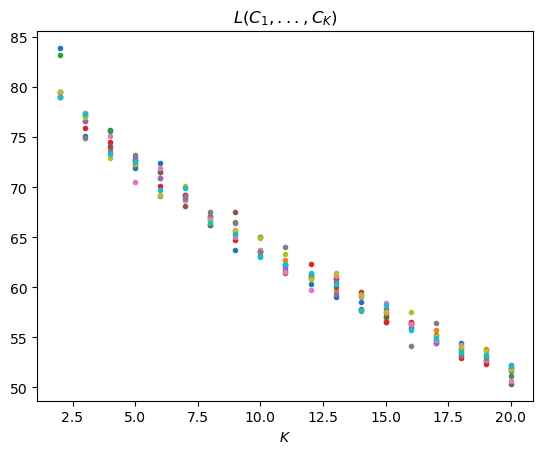

In [3]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

nruns = 10
S = []
losses = []
kvecs = []
for K in range(2,21):
    lossK = []
    for i in range(nruns):
        kmeans = KMeans(n_clusters=K, n_init='auto')
        kvec = kmeans.fit_predict(X)
        lossK.append(kmeans.inertia_)
    kvecs.append(kvec)
    losses.append(lossK)

losses = np.array(losses)
plt.plot(np.arange(2,losses.shape[0]+2), losses, '.')
plt.xlabel("$K$")
plt.title("$L(C_1,...,C_K)$")
plt.show()

## Solution:

There is no clear elbow point. There is only a slight flattening around $K^*=9$ or $10$. We can also use the point of least variability across the runs, which is also for $K^*$ from $8$ to $11$.

In [4]:
Kstar = 10
kvec = kvecs[Kstar-2]
for i in range(np.max(kvec)+1):
    print(f"Cluster {i}:")
    print(titles[kvec==i])

Cluster 0:
['Clevelands Building accommodation block' 'East Building'
 'Thornbank Gardens accommodation complex'
 'Canal Wharf accommodation complex' "The Chancellors' Building"]
Cluster 1:
['The Market' 'Lime Tree' 'Fountain Canteen' 'Sports Café' 'Post Office'
 'The Pitstop' 'Fresh' 'Chaplaincy Centre' 'Departmental Mail Services'
 '4W Café' "Students' Union" 'Parade' 'University Medical Centre'
 'The Bath Bakeaway' 'Claverton Rooms']
Cluster 2:
['Central Postgraduate Taught Admissions team' '4 West'
 'Westwood accommodation complex' 'The Quads accommodation complex'
 'Eastwood accommodation complex' '1 West' 'Polden accommodation block'
 '10 West' 'Cotswold House']
Cluster 3:
['Choose your postgraduate student accommodation options'
 'Pulteney Court student accommodation' 'Polden student accommodation'
 'Thornbank Gardens student accommodation'
 'Centurion House student accommodation'
 'Choose your undergraduate student accommodation options'
 'Woodland Court student accommodation'
